In [1]:
import numpy as np
from scipy.stats import binom
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

# ロジスティック回帰

## ロジスティック回帰の回帰方程式の意味

### ロジスティック回帰の回帰方程式
---
$\displaystyle z=a+b_{1} x_{1} +b_{2} x_{2} +\cdots +b_{k} x_{k}$ とすると、ロジスティック回帰の回帰方程式は $
\displaystyle y=\frac
    {e^{z}}
    {1+e^{z}}
=\frac
    {1}
    {1+e^{-z}}
$ で表される。

### オッズとオッズ比
---
ある事象が起きる確率を $p$ とすると、 $
\displaystyle o=\frac
    {p}
    {1-p}
$ をオッズという。オッズはある事象の起こりやすさを表す。  
また、別々のグループでのオッズ $o_{1}, o_{2}$ の比 $
\displaystyle \frac
    {o_{1}}
    {o_{2}}
$ をオッズ比という。オッズ比は他のグループと比較したときの相対的な事象の起こりやすさを表す。

練習問題

---
ある調査で、男性・女性で定期的に運動している人の割合がそれぞれ $20\% ,30\%$ だったときに、男女それぞれのオッズとオッズ比を算出する。

解答例

---

In [2]:
p_male, p_female = 0.2, 0.3
o_male = p_male / (1 - p_male)
o_female = p_female / (1 - p_female)
o_ratio = o_male / o_female
for sex, odds in zip(['男性', '女性'], [o_male, o_female]):
    print(f'{sex}のオッズ = {odds:.2f}')
print(f'オッズ比 = {o_ratio:.2f}')

男性のオッズ = 0.25
女性のオッズ = 0.43
オッズ比 = 0.58


---

### 回帰方程式とオッズ
---
オッズ $
\displaystyle o=\frac
    {p}
    {1-p}
$ を $p$ について整理すると、 $
\displaystyle p=\frac
    {o}
    {1+o}
$ となる。  
これをロジスティック関数 (ロジスティック分布の累積分布関数) $
\displaystyle f( x) =\frac
    {e^{x}}
    {1+e^{x}}
$ と比較すると、 $p$ も $f( x)$ も確率を表しているので、ロジスティック回帰の回帰方程式中の $e^{z}$ は目的変数 $y$ についてのオッズを表していると解釈できる。

### 回帰係数とオッズ比
---
説明変数 $x$ に対して回帰係数が $b$ のとき、 $x$ が 1 増加すると $z$ は $b$ 増加する。このとき $x$ の増加前後のオッズ比は $\displaystyle \frac{e^{z+b}}{e^{z}} =e^{b}$ なので、回帰係数 $b$ は $x$ についての対数オッズ比の推定量である。 $\displaystyle \left( loge^{b} =b\right)$  
例えば、 $x$ が男女を表すダミー変数 (男 = 1・女 = 0) だとすると、目的変数 $y$ に関して、男性のオッズは女性のオッズの $e^{b}$ 倍 (男性の対数オッズと女性の対数オッズの差は $b$) である。

## 回帰方程式の求め方

### 尤度

練習問題

---
表の出る確率 $p$ が不明なコインを 10 回投げて、表が 3 回出たとする。このとき、横軸に確率 $p$ (0~1) ・縦軸に $p$ がその値のときに 10 回中 3 回表が得られる確率をとったグラフを表示する。

解答例

---

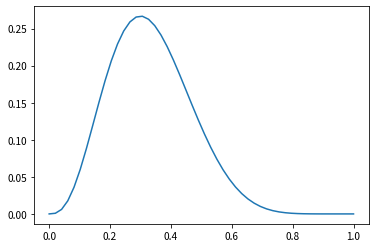

In [3]:
p = np.linspace(0, 1, 50)
y = binom.pmf(3, 10, p)
plt.plot(p, y)
plt.show()

---

ある観測値 (サンプル) が得られたときに、そのサンプルがどのようなパラメータ (母数) の分布から得られていそうか (もっともらしいか) を表す関数を尤度 (関数) という。  
上の練習問題のグラフは尤度を表しており、 $p=0.3$ のときに尤度が最大になる。この尤度が最大になるパラメーターの推定量を最尤推定量という。

### 最尤法 (Maximum Likelihood Method)
---
最尤法、または最尤推定 (maximum likelihood estimation) とは、最尤推定量 (尤度が最大になる母数) を母数の推定量とする方法。実際には尤度ではなく対数尤度を用いることが多い。

詳細は[最尤法](maximum_likelihood_estimation.ipynb)を参照。

ロジスティック回帰の場合、尤度は $\displaystyle \prod _{\{i|y_{i} =1\}}\hat{y}_{i} \cdot \prod _{\{i|y_{i} =0\}}\left( 1-\hat{y}_{i}\right)$ 、対数尤度は $\displaystyle \sum _{\{i|y_{i} =1\}} log\hat{y}_{i} +\sum _{\{i|y_{i} =0\}} log\left( 1-\hat{y}_{i}\right)$ で表される。

In [4]:
from my_functions.logistic_regression import log_likelihood
log_likelihood.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='$a$', max=10.0, min=-10.0),…

練習問題

---
`clf`データセットにロジスティック回帰を実行し、得られたモデルの対数尤度を算出する。

In [5]:
x, y = make_classification(n_features=1,
                           n_informative=1,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=1234)
clf = pd.DataFrame(dict(x=x.ravel(), y=y))
print('clf')
display(clf)

clf


,x,y
0,-0.158174,0
1,-2.460149,0
...,...,...
98,-1.377130,0
99,-0.998298,0


解答例

---

In [6]:
model = LogisticRegression(penalty='none', solver='newton-cg').fit(
    clf['x'].values.reshape((-1, 1)), clf['y'])
proba = model.predict_proba(clf['x'].values.reshape((-1, 1)))
log_likelihood = np.sum(np.log(proba[clf['y'] == 1, 1])) + np.sum(
    np.log(proba[clf['y'] == 0, 0]))
log_likelihood

-19.178769246079014

---

## 検定
---
パラメーターの標本分布を求めるのは困難なので、通常は中心極限定理によって近似し、自由度 $n-(k+1)$ の $t$ 分布を利用して $t$ 検定を行う。

### Pythonでの検定の実行方法
---
`statsmodels.discrete.discrete_model.Logit`または`statsmodels.genmod.generalized_linear_model.GLM`を使用する。`GLM`でロジスティック回帰を適用するには`family`引数に`statsmodels.genmod.families.family.Binomial`を渡す。  
いずれも切片項は自動的に追加されないので`statsmodels.tools.tools.add_constant`を使用して定数項を追加する。

In [7]:
titanic = sns.load_dataset('titanic')[['survived', 'pclass', 'sex']]
titanic['sex'] = pd.Categorical(titanic['sex']).codes
print('titanic')
display(titanic)

titanic


,survived,pclass,sex
0,0,3,1
1,1,1,0
...,...,...,...
889,1,1,1
890,0,3,1


In [8]:
help(sm.Logit)

Help on class Logit in module statsmodels.discrete.discrete_model:

class Logit(BinaryModel)
 |  Logit(endog, exog, **kwargs)
 |  
 |  Logit Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  
 |  Attributes
 |  ----------
 |  endog : ndarray
 |      A reference to the endogenous response variable
 |  exog : ndarray
 |      A reference to the exogenous design.
 |  
 |  Method resolution order:
 |      Logit
 |   

In [9]:
x = sm.add_constant(titanic[['pclass', 'sex']])
model = sm.Logit(titanic['survived'], x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.464195
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Sun, 24 May 2020   Pseudo R-squ.:                  0.3029
Time:                        14:29:44   Log-Likelihood:                -413.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.798e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2946      0.297     11.077      0.000       2.712       3.878
pclass        -0.9606      0.106     -9.057      0.000      -1.168      -0.753
sex           -2.6434      0.184    -14.380      0.000      -3.004      -2.283
==============================================================================
"""

In [10]:
help(sm.GLM)

Help on class GLM in module statsmodels.genmod.generalized_linear_model:

class GLM(statsmodels.base.model.LikelihoodModel)
 |  GLM(endog, exog, family=None, offset=None, exposure=None, freq_weights=None, var_weights=None, missing='none', **kwargs)
 |  
 |  Generalized Linear Models
 |  
 |  GLM inherits from statsmodels.base.model.LikelihoodModel
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      1d array of endogenous response variable.  This array can be 1d or 2d.
 |      Binomial family models accept a 2d array with two columns. If
 |      supplied, each observation is expected to be [success, failure].
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user (models specified using a formula
 |      include an intercept by default). See `statsmodels.tools.add_constant`.
 |  family : family class instance
 |    

In [11]:
model = sm.GLM(titanic['survived'], x, family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      888
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -413.60
Date:                Sun, 24 May 2020   Deviance:                       827.20
Time:                        14:29:44   Pearson chi2:                     911.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2946      0.297     11.077      0.000       2.712       3.878
pclass        -0.9606      0.106     -9.057      0.000      -1.168      -0.753
sex           -2.6434      0.184    -14.380      0.000      -3.004      -2.283
==============================================================================
"""

## 多項ロジスティック回帰
---
目的変数のクラス数 (水準) が 3 以上の場合のロジスティック回帰。

$k$ 個の特徴を持つサンプル $\boldsymbol{x} =( x_{1} ,x_{2} ,\cdots ,x_{k})^{T}$ に対して $c$ 個のクラスを持つ目的変数を予測する場合、サイズ $c\times k$ の行列 $\boldsymbol{W}$ を用いて、要素数 $c$ のベクトル $\boldsymbol{z} =\boldsymbol{Wx}$ を作成する。その $z$ に対してソフトマックス関数を適用して確率を算出する。

### ソフトマックス関数
---
クラス数 $c$ 中の $i$ 番目のクラスに対応する確率を以下のように表すのがソフトマックス関数。

$
\displaystyle \begin{aligned}
    \hat{y}_{i} & =\frac
        {e^{z_{i}}}
        {\displaystyle \sum ^{c}_{j=1} e^{z_{j}}}\\
     & \\
     & =\frac
         {e^{z_{i}}}
         {e^{z_{1}} +e^{z_{2}} +\cdots +e^{z_{c}}}
\end{aligned}
$

クラス数を $2$ とした場合、

$
\displaystyle \begin{aligned}
    \hat{y}_{1} & =\frac
        {e^{z_{1}}}
        {e^{z_{1}} +e^{z_{2}}}
    \\
     & \\
     & =\frac
         {1}
         {1+e^{z_{2} -z_{1}}}
\end{aligned}
$

となり、ロジスティック関数 $\displaystyle f( x) =\frac{1}{1+e^{-x}}$ と一致する。つまり、ソフトマックス関数はロジスティック関数の多クラスへの拡張 (ロジスティック関数はクラス数 $2$ の場合のソフトマックス関数の特殊形) である。

練習問題

---
`iris`データセットに対して、各クラスを予測するための重み行列`w`(値は乱数でよい) を作成し、ソフトマックス関数を適用して予測値を算出する。

In [12]:
iris = sns.load_dataset('iris')
print('iris')
display(iris)

iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


解答例

---

In [13]:
np.random.seed(1234)
w = np.random.normal(size=(iris.iloc[:, :-1].shape[1],
                           iris['species'].nunique()))
z = iris.iloc[:, :-1].values.dot(w)
e = np.exp(z)
pd.DataFrame(e / e.sum(axis=1).reshape(-1, 1))

,0,1,2
0,0.000190,2.301758e-09,0.999810
1,0.000420,8.688983e-09,0.999580
...,...,...,...
148,0.000002,1.547846e-11,0.999998
149,0.000021,7.269393e-11,0.999979


---

## 推薦図書
---
- [Python 機械学習プログラミング 達人データサイエンティストによる理論と実践](https://www.amazon.co.jp/Python-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E9%81%94%E4%BA%BA%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E3%81%AB%E3%82%88%E3%82%8B%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%B7%B5-impress-gear/dp/4295003379/)
- [機械学習のエッセンス -実装しながら学ぶPython,数学,アルゴリズム-](https://www.amazon.co.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E3%82%A8%E3%83%83%E3%82%BB%E3%83%B3%E3%82%B9-%E5%AE%9F%E8%A3%85%E3%81%97%E3%81%AA%E3%81%8C%E3%82%89%E5%AD%A6%E3%81%B6Python-%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0-Machine-Learning/dp/4797393963/)